# Why
I'm a bit new to using machine learning for data analysis.  I've always done analysis by hand and figured since I knew Python, why not give this a try.  Who knows what we might find.

Note: This is just for fun and is not something I'm particularly skilled in.  Best practices may or not be in use.

In [2]:
#from google.colab import files
#my_files=files.upload()

Saving lottery_final3.csv to lottery_final3.csv


In [1]:
# import and prepare data

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import io
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

df = pd.read_csv('lottery_final3.csv')

# Show first 5 entries
df.head()

,Date,ball1,ball2,ball3,ball4,ball5,ball6,Bonus
0,02.12.07,10,23,29,33,37,40,16
1,02.12.14,9,13,21,25,32,42,2
2,02.12.21,11,16,19,21,27,31,30
3,02.12.28,14,27,30,31,40,42,2
4,03.01.04,16,24,29,40,41,42,3


In [2]:
# Dataframe Size
print(f'Dataframe Size: {df.shape}')
df.loc[:, ['ball1', 'ball2', 'ball3', 'ball4', 'ball5','ball6','Bonus']]

Dataframe Size: (930, 8)


,ball1,ball2,ball3,ball4,ball5,ball6,Bonus
0,10,23,29,33,37,40,16
1,9,13,21,25,32,42,2
2,11,16,19,21,27,31,30
3,14,27,30,31,40,42,2
4,16,24,29,40,41,42,3
...,...,...,...,...,...,...,...
925,10,16,18,20,25,31,6
926,4,15,22,38,41,43,26
927,3,4,10,20,28,44,30
928,7,9,12,15,19,23,4


In [3]:
# Show information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    930 non-null    object
 1   ball1   930 non-null    int64 
 2   ball2   930 non-null    int64 
 3   ball3   930 non-null    int64 
 4   ball4   930 non-null    int64 
 5   ball5   930 non-null    int64 
 6   ball6   930 non-null    int64 
 7   Bonus   930 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 58.2+ KB


# Ball 1 Frequency Chart

<AxesSubplot:xlabel='ball1', ylabel='count'>

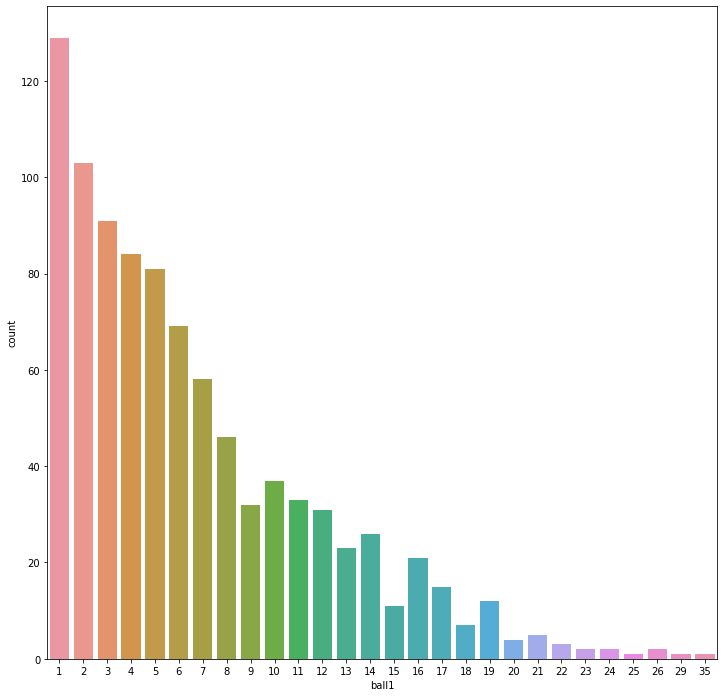

In [4]:
import seaborn as sns
import matplotlib as mpl

mpl.rc("figure", figsize=(12, 12))

#Frequency of Ball #1
sns.countplot(x="ball1", data=df)

# Ball 2 Frequency Chart

<AxesSubplot:xlabel='ball2', ylabel='count'>

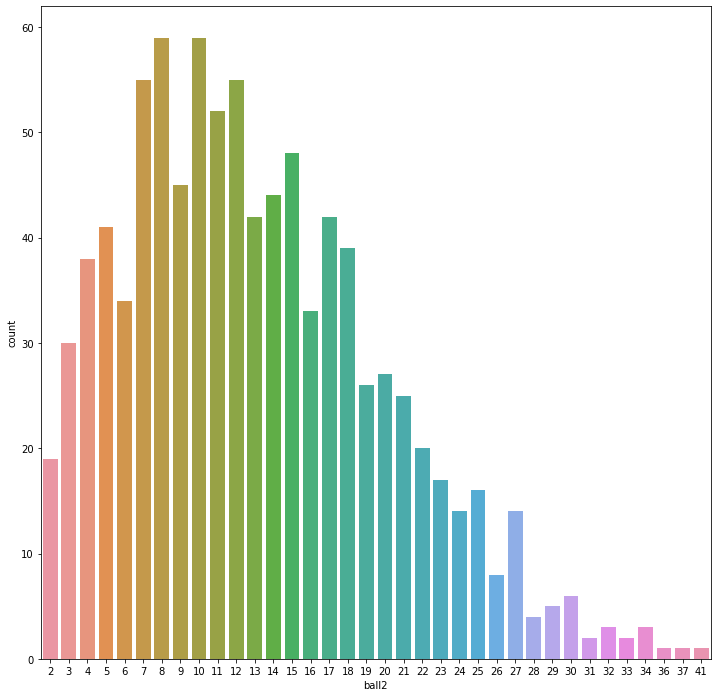

In [5]:
#Frequency of Ball #2
sns.countplot(x="ball2", data=df)

# Ball 3 Frequency Chart

<AxesSubplot:xlabel='ball3', ylabel='count'>

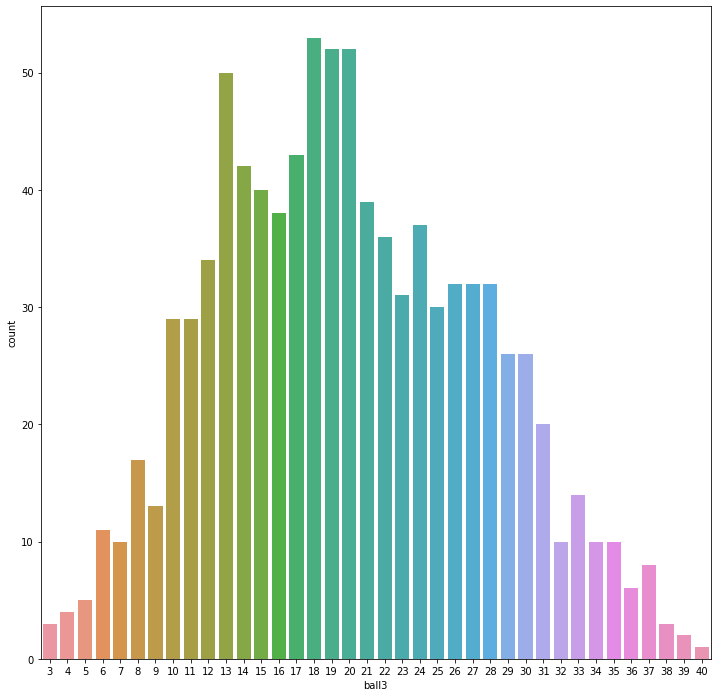

In [6]:
#Frequency of Ball #3
sns.countplot(x="ball3", data=df)

# Ball 4 Frequency Chart

<AxesSubplot:xlabel='ball4', ylabel='count'>

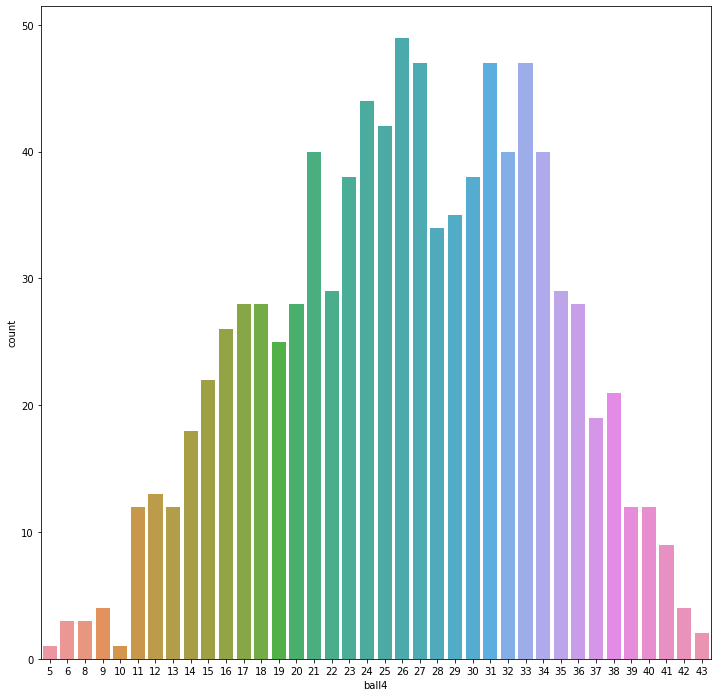

In [7]:
#Frequency of Ball #4
sns.countplot(x="ball4", data=df)

# Ball 5 Frequency Chart

<AxesSubplot:xlabel='ball5', ylabel='count'>

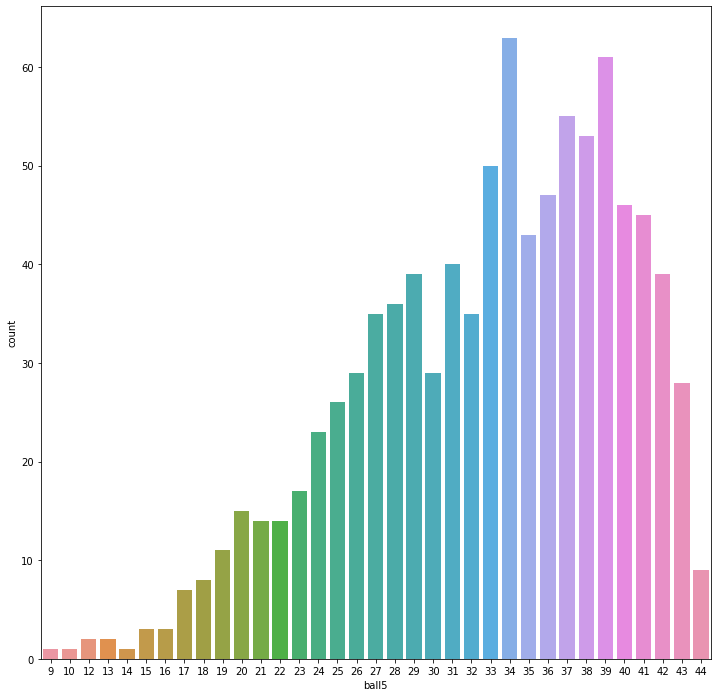

In [8]:
#Frequency of Ball #5
sns.countplot(x="ball5", data=df)

# Ball 6 Frequency Chart

<AxesSubplot:xlabel='ball6', ylabel='count'>

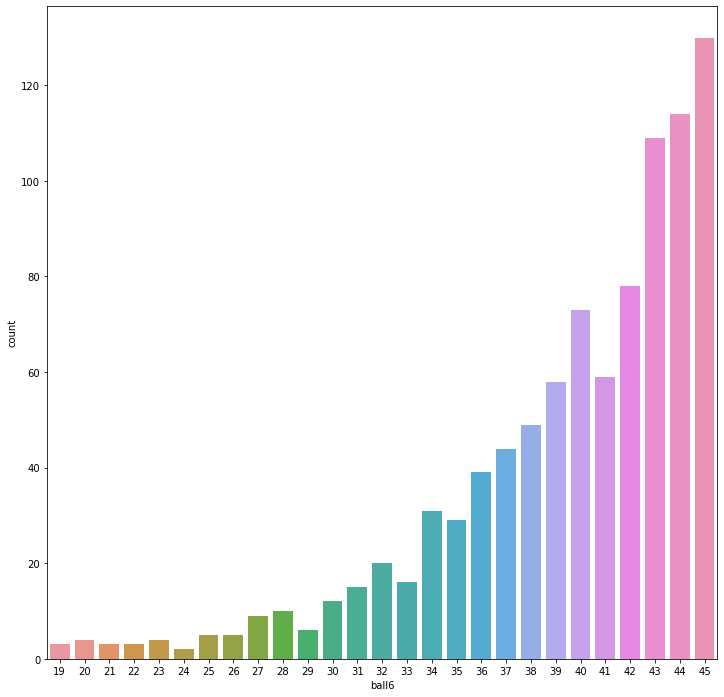

In [9]:
#Frequency of Ball #6
sns.countplot(x="ball6", data=df)

# Bonus Frequency Chart

<AxesSubplot:xlabel='Bonus', ylabel='count'>

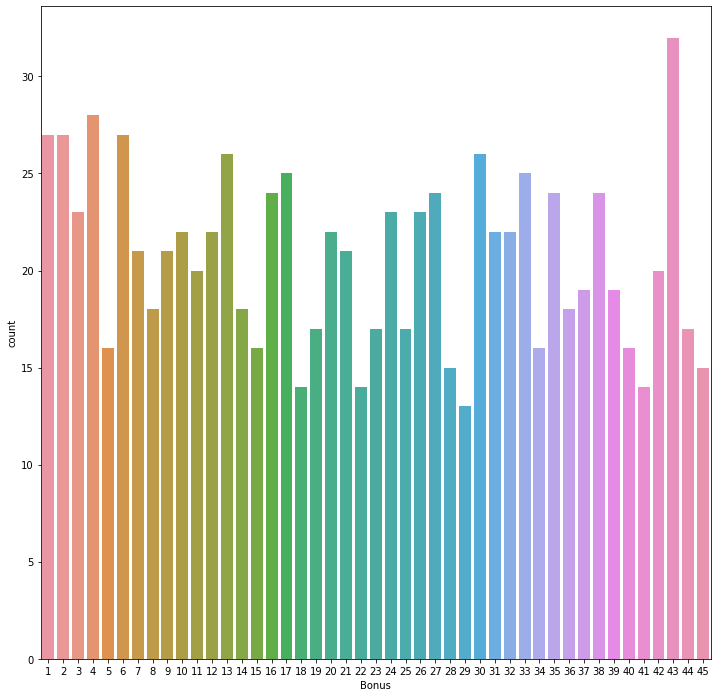

In [10]:
sns.countplot(x="Bonus", data=df)

# Look at the distribution of the sum of each winning drawing
The most common ball number is shown in the mode table which is shown next

C:\Users\sjh96\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

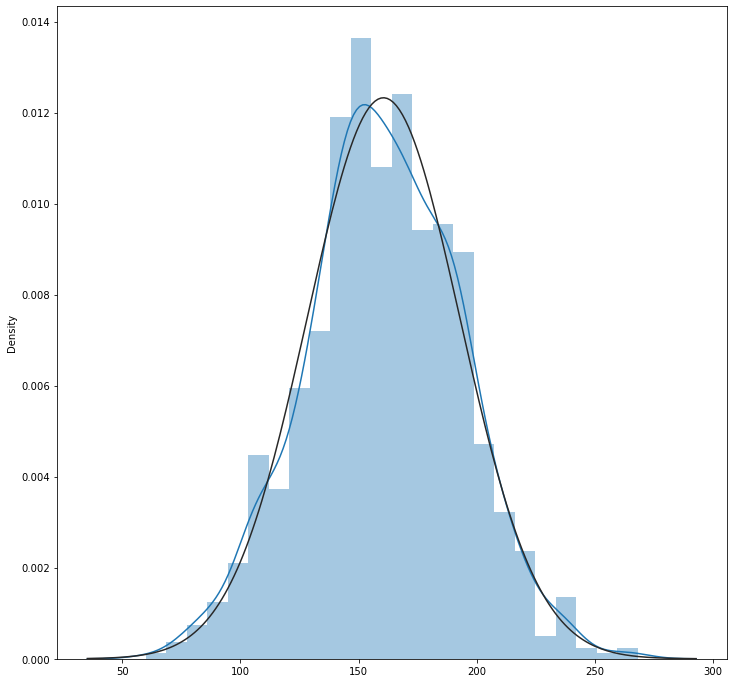

In [11]:
from scipy import stats
sns.distplot(df.sum(axis=1), fit=stats.gamma)

# Most Frequent Numbers by Ball

In [12]:
df.mode()

,Date,ball1,ball2,ball3,ball4,ball5,ball6,Bonus
0,02.12.07,1.0,8.0,18.0,26.0,34.0,45.0,43.0
1,02.12.14,NaN,10.0,NaN,NaN,NaN,NaN,NaN
2,02.12.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,02.12.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,03.01.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
925,20.08.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
926,20.09.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
927,20.09.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
928,20.09.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Test prediction model
We use `random_state=None` in order to add a degree of chance to this, just like the real lottery. Every run should be different!

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

X = np.array([df["ball1"], df["ball2"], df["ball3"], df["ball4"], df["ball5"], df["ball6"],df["Bonus"]] )
bindex = 0
final = []

for ball in [ df["ball1"], df["ball2"], df["ball3"], df["ball4"], df["ball5"], df["ball6"],df["Bonus"] ]:
    Y = np.array(ball.values.tolist())
    X_train, X_test, y_train, y_test = train_test_split(X.transpose(), Y, test_size=0.9, random_state=None)
    clf = GradientBoostingClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)               # prediction
    accuracy = accuracy_score(y_test, y_pred)  # check accuracy
    for ball in [ df["ball1"], df["ball2"], df["ball3"], df["ball4"], df["ball5"], df["ball6"],df["Bonus"] ]:
        Y = np.array(ball.values.tolist())
        X_train, X_test, y_train, y_test = train_test_split(X.transpose(), Y, test_size=0.9, random_state=None)
        clf = GradientBoostingClassifier()
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)               # prediction
        accuracy = accuracy_score(y_test, y_pred)
        if y_pred[bindex+1]!=y_pred[bindex]:
            pass
        elif y_pred[bindex+2]!=y_pred[bindex]:
            pass
        elif y_pred[bindex+3]!=y_pred[bindex]:
            pass
        elif y_pred[bindex+4]!=y_pred[bindex]:
            pass
        elif y_pred[bindex+5]!=y_pred[bindex]:
            pass
        elif y_pred[bindex+6]!=y_pred[bindex]:
            pass
        else:
            for ball in [ df["ball1"], df["ball2"], df["ball3"], df["ball4"], df["ball5"], df["ball6"],df["Bonus"] ]:
                Y = np.array(ball.values.tolist())
                X_train, X_test, y_train, y_test = train_test_split(X.transpose(), Y, test_size=0.9, random_state=None)
                clf = GradientBoostingClassifier()
                clf.fit(X_train, y_train)
                y_pred = clf.predict(X_test)               # prediction
                accuracy = accuracy_score(y_test, y_pred)  # check accuracy

    final.append(y_pred[bindex])
    print(f"Prediction of Ball {bindex + 1} is [{y_pred[bindex]}] with tested accuracy of {accuracy * 100}")
    bindex = bindex + 1   

Prediction of Ball 1 is [8] with tested accuracy of 54.83870967741935
Prediction of Ball 2 is [3] with tested accuracy of 59.37873357228196
Prediction of Ball 3 is [10] with tested accuracy of 46.47550776583035
Prediction of Ball 4 is [5] with tested accuracy of 55.794504181600956
Prediction of Ball 5 is [24] with tested accuracy of 59.02031063321386
Prediction of Ball 6 is [41] with tested accuracy of 50.418160095579445
Prediction of Ball 7 is [15] with tested accuracy of 57.94504181600956


# Prediction

In [17]:
from scipy import stats

print(f"Predicted Numbers: {final}")

S = sum(final)
print(f"Sum of numbers: {S}")
print(f"Sum is good!") if S >= 120 and S <= 190 else print(f"Sum of prediction is out of ideal range. Re-run prediction.")



Predicted Numbers: [8, 3, 10, 5, 24, 41, 15]
Sum of numbers: 106
Sum of prediction is out of ideal range. Re-run prediction.
